In [48]:
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
trial_data = pd.read_csv('Resources/clinicaltrial_data.csv', low_memory=False)
mouse_data = pd.read_csv('Resources/mouse_drug_data.csv', low_memory=False)

In [51]:
# g989 Stelasyn and Propriva

In [72]:
mousedrug = {}
drug = []
counter = 0
for i in mouse_data['Mouse ID']:
    mousedrug[i] = mouse_data['Drug'][counter]
    counter += 1
for i in trial_data['Mouse ID']:
    if i in mousedrug:
        drug.append(mousedrug[i])
len(drug)
trial_data = trial_data.assign(Drug= drug)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [58]:
druggroup = trial_data.groupby(['Drug', 'Timepoint'])
tumor_time_metast = druggroup.mean()
tumor_time_metast.head()

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174

In [116]:
ttm = tumor_time_metast.reset_index()
tumor_time = ttm.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tt = tumor_time.reset_index()
tt.head()
tt.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334


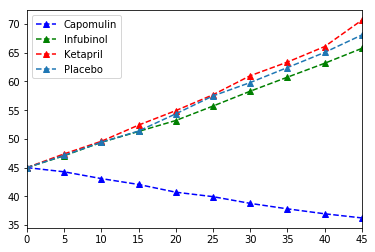

In [134]:
#ttm.plot(kind='scatter', x='Timepoint', y='Tumor Volume (mm3)')
fig, ax = plt.subplots()
ax.set_xlim(tt['Timepoint'][0], tt['Timepoint'].max(), 1)
ax.plot(tt['Timepoint'], tt['Capomulin'], 'b--', marker='^', label='Capomulin')
ax.plot(tt['Timepoint'], tt['Infubinol'], 'g--', marker='^', label='Infubinol')
ax.plot(tt['Timepoint'], tt['Ketapril'], 'r--', marker='^', label='Ketapril')
ax.plot(tt['Timepoint'], tt['Placebo'], 'p--', marker='^', label='Placebo')

ax.legend()

In [63]:
metast_time = ttm.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
metast_time.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118


In [71]:
micecount = druggroup.count()
mc = micecount.reset_index()
surv_rate = mc.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
surv_rate.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,24,25
5,25,21,25,23,23,24,25,25,23,24
10,25,20,21,22,21,24,23,24,21,22
15,24,19,21,19,21,20,17,24,21,21
20,23,18,20,19,20,19,17,23,19,17


In [96]:
first = tumor_time.iloc[0,:]
last = tumor_time.iloc[-1,:]
diff = last - first
pers = first/100*diff
pers

Drug
Capomulin    -3.943749
Ceftamin      8.609590
Infubinol     9.340003
Ketapril     11.548331
Naftisol     10.919478
Placebo      10.387837
Propriva      9.566338
Ramicane     -4.519982
Stelasyn     10.547240
Zoniferol     9.432400
dtype: float64